In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Matrix multiplication

In [3]:
v = tf.placeholder(tf.float32)
A = tf.placeholder(tf.float32, shape=(5,5), name='A')

w = tf.matmul(A, v)

with tf.Session() as session:
    output = session.run(w, feed_dict={A: np.random.randn(5, 5), v: np.random.randn(5, 1)})
    
    print(type(output))
    print(output)

<class 'numpy.ndarray'>
[[-3.35990334]
 [-2.98146868]
 [-0.50485754]
 [ 1.67346978]
 [ 1.59832478]]


# Shared variables

In [7]:
x = tf.Variable(tf.random_normal((2, 2)))
t = tf.Variable(0)

init = tf.global_variables_initializer()
with tf.Session() as session:
    out = session.run(init)
    print(out)
    
    print(x.eval())
    print(t.eval())

None
[[-0.39176068  0.31372842]
 [-0.33116049 -0.23026608]]
0


# Gradient Descent

In [9]:
u = tf.Variable(20.0)
cost = u*u + u + 1

train_op = tf.train.GradientDescentOptimizer(0.3).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    
    for i in range(15):
        session.run(train_op)
        print("i = {}, cost = {:.3f}, u = {:.3f}".format(i, cost.eval(), u.eval()))

i = 0, cost = 67.990, u = 7.700
i = 1, cost = 11.508, u = 2.780
i = 2, cost = 2.471, u = 0.812
i = 3, cost = 1.025, u = 0.025
i = 4, cost = 0.794, u = -0.290
i = 5, cost = 0.757, u = -0.416
i = 6, cost = 0.751, u = -0.466
i = 7, cost = 0.750, u = -0.487
i = 8, cost = 0.750, u = -0.495
i = 9, cost = 0.750, u = -0.498
i = 10, cost = 0.750, u = -0.499
i = 11, cost = 0.750, u = -0.500
i = 12, cost = 0.750, u = -0.500
i = 13, cost = 0.750, u = -0.500
i = 14, cost = 0.750, u = -0.500


# 2 Hidden layer Neural Network

In [11]:
def get_normalized_data():
    df = pd.read_csv('../datasets/mnist/train.csv')
    data = df.as_matrix().astype(np.float32)
    np.random.shuffle(data)
    X = data[:, 1:]
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    np.place(std, std == 0, 1)
    X = (X - mu) / std # normalize the data
    Y = data[:, 0]
    return X, Y

def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N, 10))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

def error_rate(p, t):
    return np.mean(p != t)

In [12]:
X, Y = get_normalized_data()
Xtrain = X[:-1000,]
Ytrain = Y[:-1000]
Xtest  = X[-1000:,]
Ytest  = Y[-1000:]
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

max_iter = 200
print_period = 20

lr = 0.00004
reg = 0.01

N, D = Xtrain.shape
batch_sz = 500
n_batches = N // batch_sz

# add an extra layer just for fun
M1 = 300
M2 = 100
K = 10
W1_init = np.random.randn(D, M1) / 28
b1_init = np.zeros(M1)
W2_init = np.random.randn(M1, M2) / np.sqrt(M1)
b2_init = np.zeros(M2)
W3_init = np.random.randn(M2, K) / np.sqrt(M2)
b3_init = np.zeros(K)

In [13]:
# define variables and expressions
X = tf.placeholder(tf.float32, shape=(None, D), name='X')
T = tf.placeholder(tf.float32, shape=(None, K), name='T')

W1 = tf.Variable(W1_init.astype(np.float32))
b1 = tf.Variable(b1_init.astype(np.float32))
W2 = tf.Variable(W2_init.astype(np.float32))
b2 = tf.Variable(b2_init.astype(np.float32))
W3 = tf.Variable(W3_init.astype(np.float32))
b3 = tf.Variable(b3_init.astype(np.float32))

# define the model
Z1 = tf.nn.relu( tf.matmul(X, W1)+b1 )
Z2 = tf.nn.relu( tf.matmul(Z1, W2)+b2 )
Yish = tf.matmul(Z2, W3) + b3 # remember, the cost function does the softmaxing! weird, right?

# softmax_cross_entropy_with_logits take in the "logits"
# if you wanted to know the actual output of the neural net,
# you could pass "Yish" into tf.nn.softmax(logits)
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=Yish, labels=T))

# we choose the optimizer but don't implement the algorithm ourselves
# let's go with RMSprop, since we just learned about it.
# it includes momentum!
train_op = tf.train.RMSPropOptimizer(lr, decay=0.99, momentum=0.9).minimize(cost)

# we'll use this to calculate the error rate
predict_op = tf.argmax(Yish, 1)

Cost / err at iteration i=0, j=0: 2355.775 / 0.898
Cost / err at iteration i=20, j=0: 146.480 / 0.033
Cost / err at iteration i=40, j=0: 208.420 / 0.027
Cost / err at iteration i=60, j=0: 226.193 / 0.020
Cost / err at iteration i=80, j=0: 276.242 / 0.023
Cost / err at iteration i=100, j=0: 280.043 / 0.020
Cost / err at iteration i=120, j=0: 286.510 / 0.021
Cost / err at iteration i=140, j=0: 287.023 / 0.020
Cost / err at iteration i=160, j=0: 290.276 / 0.021
Cost / err at iteration i=180, j=0: 293.962 / 0.020


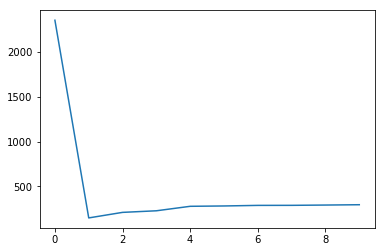

In [14]:
costs = []
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)


    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]

            session.run(train_op, feed_dict={X: Xbatch, T: Ybatch})
            if i%print_period==0 and j==0:
                test_cost = session.run(cost, feed_dict={X: Xtest, T: Ytest_ind})
                prediction = session.run(predict_op, feed_dict={X: Xtest})
                err = error_rate(prediction, Ytest)
                print("Cost / err at iteration i={}, j={}: {:.3f} / {:.3f}".format(i, j, test_cost, err))
                costs.append(test_cost)

plt.plot(costs)
plt.show()

* Add regularization!